# ---IN4640 Assignment 1 on Intensity Transformations and Neighborhood Filtering---

### Download Figures

In [1]:
urls = ["https://github.com/Arachchimkf/-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Images/runway.png",
        "https://github.com/Arachchimkf/-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Images/emma_salt_pepper.jpg",
        "https://github.com/Arachchimkf/-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Images/highlights_and_shadows.jpg",
        "https://github.com/Arachchimkf/-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Images/looking_out.jpg",
        "https://github.com/Arachchimkf/-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Images/images_for_zooming/a1q5images/im01.png",
        "https://github.com/Arachchimkf/-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Images/images_for_zooming/a1q5images/im01small.png",
        "https://github.com/Arachchimkf/-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Images/images_for_zooming/a1q5images/im02.png",
        "https://github.com/Arachchimkf/-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Images/images_for_zooming/a1q5images/im02small.png",
        "https://github.com/Arachchimkf/-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Images/images_for_zooming/a1q5images/im03.png",
        "https://github.com/Arachchimkf/-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Images/images_for_zooming/a1q5images/im03small.png",
        "https://github.com/Arachchimkf/-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Images/images_for_zooming/a1q5images/taylor.jpg",
        "https://github.com/Arachchimkf/-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Images/images_for_zooming/a1q5images/taylor_small.jpg",
        "https://github.com/Arachchimkf/-Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Images/images_for_zooming/a1q5images/taylor_very_small.jpg"]

for url in urls:
    raw_url = url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
    !wget -q {raw_url} -O {raw_url.split("/")[-1]}

!ls *.jpg *.png

emma_salt_pepper.jpg	    im02small.png    taylor.jpg
highlights_and_shadows.jpg  im03.png	     taylor_small.jpg
im01.png		    im03small.png    taylor_very_small.jpg
im01small.png		    looking_out.jpg
im02.png		    runway.png


### Import Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Question 01

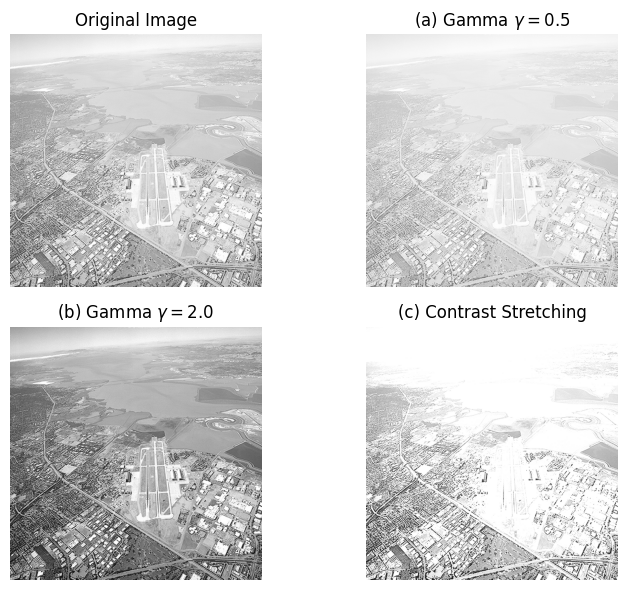

In [3]:
# 1. Load the image
# Note: Using your repo logic, ensure 'runway.png' is in the working directory
img = cv2.imread('runway.png', cv2.IMREAD_GRAYSCALE)

def apply_gamma(image, gamma):
    """Applies gamma correction using a Lookup Table (LUT) for efficiency."""
    # Build a lookup table mapping the pixel values [0, 255] to their new values
    invGamma = gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    # Apply the mapping using cv2.LUT
    return cv2.LUT(image, table)

# --- (a) Gamma Correction (Brightening) ---
img_gamma_05 = apply_gamma(img, 0.5)

# --- (b) Gamma Correction (Darkening) ---
img_gamma_2 = apply_gamma(img, 2.0)

# --- (c) Contrast Stretching (Piecewise Linear) ---
# Parameters normalized to 0-255 range for direct comparison
r_min, r_max = 0.2 * 255, 0.8 * 255

# Using np.interp is a cleaner way to handle piecewise linear stretching
# It maps values < r_min to 0, values > r_max to 255, and interpolates between
pixels = np.arange(256)
stretch_table = np.interp(pixels, [r_min, r_max], [0, 255]).astype(np.uint8)
img_contrast = cv2.LUT(img, stretch_table)


# Visualization 

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
titles = ['Original Image', r'(a) Gamma $\gamma=0.5$', 
          r'(b) Gamma $\gamma=2.0$', '(c) Contrast Stretching']
images = [img, img_gamma_05, img_gamma_2, img_contrast]

for ax, i, title in zip(axes.flat, images, titles):
    ax.imshow(i, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Question 02

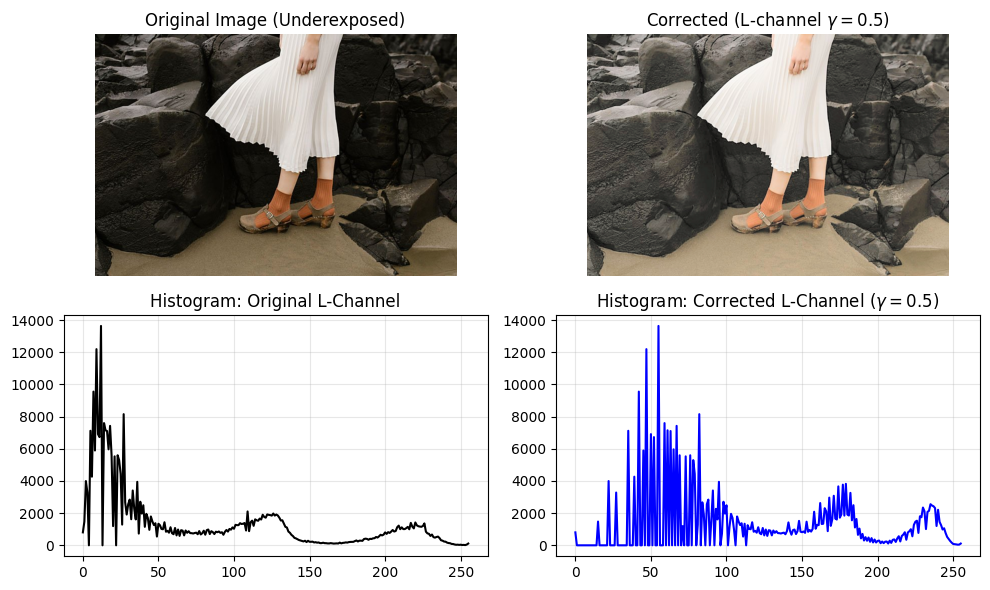

In [5]:
# 1. Load and prepare image
img_bgr = cv2.imread('highlights_and_shadows.jpg')
img_original_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 2. Convert to CIE L*a*b* color space
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(img_lab)

# 3. Optimized Gamma Correction on L-channel using LUT
gamma = 0.5
# Create a mapping table for the 256 possible intensity values
lut = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
l_corrected = cv2.LUT(l, lut)

# 4. Merge back and convert to RGB for display
img_lab_corrected = cv2.merge((l_corrected, a, b))
img_corrected_rgb = cv2.cvtColor(cv2.cvtColor(img_lab_corrected, cv2.COLOR_LAB2BGR), cv2.COLOR_BGR2RGB)

# 5. Histogram Calculation
hist_before = cv2.calcHist([l], [0], None, [256], [0, 256])
hist_after = cv2.calcHist([l_corrected], [0], None, [256], [0, 256])

# Visualization for Report
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Display Images
axes[0, 0].imshow(img_original_rgb)
axes[0, 0].set_title('Original Image (Underexposed)')
axes[0, 1].imshow(img_corrected_rgb)
axes[0, 1].set_title(rf'Corrected (L-channel $\gamma={gamma}$)')

# Display Histograms
axes[1, 0].plot(hist_before, color='black', lw=1.5)
axes[1, 0].set_title('Histogram: Original L-Channel')
axes[1, 1].plot(hist_after, color='blue', lw=1.5)
axes[1, 1].set_title(rf'Histogram: Corrected L-Channel ($\gamma={gamma}$)')

for ax in axes[0, :]: ax.axis('off')
for ax in axes[1, :]: ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Question 03

/tmp/ipython-input-4031996298.py:32: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1, 0].hist(img.ravel(), 256, [0, 256], color='black')
/tmp/ipython-input-4031996298.py:34: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1, 1].hist(img_equalized.ravel(), 256, [0, 256], color='blue')


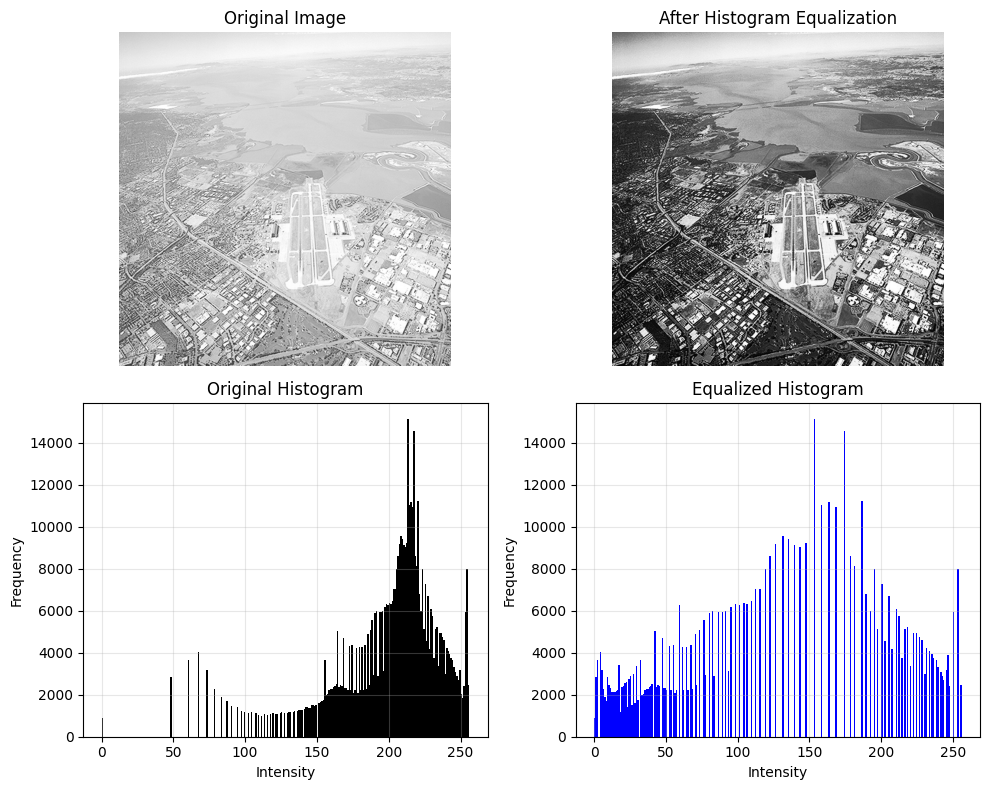

In [ ]:
# 1. Load image
img = cv2.imread('runway.png', cv2.IMREAD_GRAYSCALE)

# --- Manual Histogram Equalization (Refined)

# Step A & B: Calculate Histogram and Cumulative Sum (CDF)
hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
cdf = hist.cumsum()

# Step C & D: Normalize CDF and Create Lookup Table (LUT)
# Using the formula from L02: T(rk) = (L-1)/(MN) * CDF(rk)
# Here (L-1) = 255 and (MN) = total number of pixels
cdf_m = np.ma.masked_equal(cdf, 0) # Masking zeros to avoid division errors
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
lookup_table = np.ma.filled(cdf_m, 0).astype('uint8')

# Step E: Map the image using the LUT
img_equalized = cv2.LUT(img, lookup_table)

# Visualization (Cleaned for Report)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Images
axes[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title('Original Image')
axes[0, 1].imshow(img_equalized, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title('After Histogram Equalization')

# Histograms
axes[1, 0].hist(img.ravel(), 256, [0, 256], color='black')
axes[1, 0].set_title('Original Histogram')
axes[1, 1].hist(img_equalized.ravel(), 256, [0, 256], color='blue')
axes[1, 1].set_title('Equalized Histogram')

for ax in axes[0, :]: ax.axis('off')
for ax in axes[1, :]: 
    ax.set_xlabel('Intensity'); ax.set_ylabel('Frequency'); ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Question 04

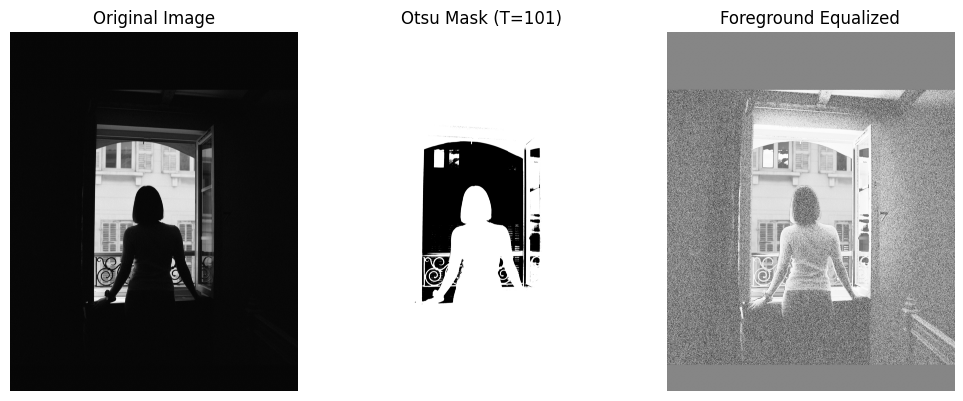

In [11]:
# 1. Load image in grayscale
img = cv2.imread('looking_out.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Otsu's Thresholding to create a foreground mask
# THRESH_BINARY_INV is used because the person/room is dark (low intensity)
val, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 3. Masked Histogram Equalization
# Isolate pixels in the foreground
foreground_pixels = img[mask == 255]

# Calculate Histogram and CDF for foreground only
hist = cv2.calcHist([foreground_pixels], [0], None, [256], [0, 256]).flatten()
cdf = hist.cumsum()

# Normalize CDF: T(rk) = (L-1) * (cdf - min_cdf) / (total_pixels - min_cdf)
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
lut = np.ma.filled(cdf_m, 0).astype('uint8')

# 4. Apply transformation and rebuild image
img_result = img.copy()
img_result[mask == 255] = lut[foreground_pixels]

# Visualization for Report
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
titles = ['Original Image', f'Otsu Mask (T={int(val)})', 'Foreground Equalized']
imgs = [img, mask, img_result]

for ax, i, title in zip(axes, imgs, titles):
    ax.imshow(i, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Question 05

Computed 5x5 Gaussian Kernel:
[[0.0232 0.0338 0.0383 0.0338 0.0232]
 [0.0338 0.0492 0.0558 0.0492 0.0338]
 [0.0383 0.0558 0.0632 0.0558 0.0383]
 [0.0338 0.0492 0.0558 0.0492 0.0338]
 [0.0232 0.0338 0.0383 0.0338 0.0232]]


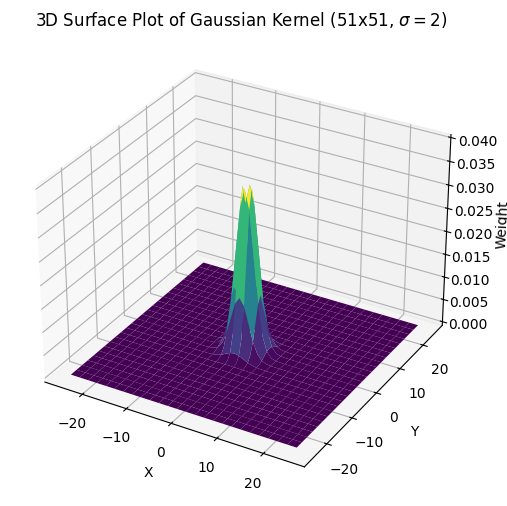

(np.float64(-0.5), np.float64(764.5), np.float64(768.5), np.float64(-0.5))

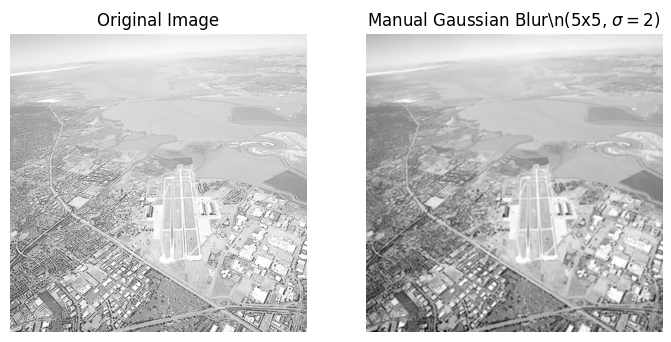

In [52]:
sigma = 2
kernel_size_small = 5   # For part (a) and (c)
kernel_size_large = 51  # For part (b) visualization

# 1. (a) Compute Normalized 5x5 Gaussian Kernel manually
# Create a grid of coordinates centered at (0,0)
# For 5x5, range is -2 to 2
ax = np.arange(-kernel_size_small // 2 + 1., kernel_size_small // 2 + 1.)
xx, yy = np.meshgrid(ax, ax)

# Calculate the Gaussian function
# Formula: (1 / (2*pi*sigma^2)) * exp(-(x^2 + y^2) / (2*sigma^2))
kernel_raw = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))

# Normalize so sum = 1
kernel_5x5 = kernel_raw / np.sum(kernel_raw)

print("Computed 5x5 Gaussian Kernel:")
print(np.round(kernel_5x5, 4))

# 2. (b) Visualize a 51x51 Gaussian Kernel as 3D Surface
# Generate the larger grid
ax_large = np.arange(-kernel_size_large // 2 + 1., kernel_size_large // 2 + 1.)
xx_large, yy_large = np.meshgrid(ax_large, ax_large)
kernel_large_raw = np.exp(-(xx_large**2 + yy_large**2) / (2. * sigma**2))
kernel_large = kernel_large_raw / np.sum(kernel_large_raw)

# Plotting the 3D Surface
fig = plt.figure(figsize=(10, 6))
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot_surface(xx_large, yy_large, kernel_large, cmap='viridis')

# FIX: Use rf'' (raw f-string) to handle the backslash for sigma correctly
ax3d.set_title(rf'3D Surface Plot of Gaussian Kernel (51x51, $\sigma={sigma}$)')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Weight')

plt.show()

# 3. Load Image for Smoothing
img = cv2.imread('runway.png', cv2.IMREAD_GRAYSCALE)


# 4. (c) Apply Manual Gaussian Smoothing
# We use filter2D to convolve our manually created kernel with the image
img_manual_smooth = cv2.filter2D(img, -1, kernel_5x5)

# 5. (d) Apply OpenCV's Built-in GaussianBlur
# borderType default is reflected, usually fine for comparison
img_opencv_smooth = cv2.GaussianBlur(img, (kernel_size_small, kernel_size_small), sigma)

# 6. Comparison Visualization
plt.figure(figsize=(13, 5))

# Original
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Manual
# FIX: Use rf'' for raw string formatting
plt.subplot(1, 3, 2)
plt.imshow(img_manual_smooth, cmap='gray')
plt.title(rf'Manual Gaussian Blur\n(5x5, $\sigma={sigma}$)')
plt.axis('off')


##### Part (d)

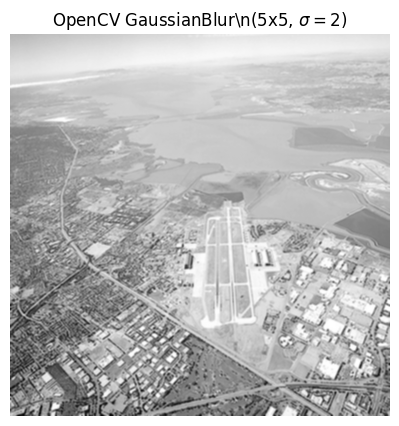

In [42]:
# OpenCV
# FIX: Use rf'' for raw string formatting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 3)
plt.imshow(img_opencv_smooth, cmap='gray')
plt.title(rf'OpenCV GaussianBlur\n(5x5, $\sigma={sigma}$)')
plt.axis('off')

plt.tight_layout()

plt.show()

In [53]:
# from mpl_toolkits.mplot3d import Axes3D

# # --- Configuration ---
# sigma = 2
# k_small = 5
# k_large = 51

# # 1. Manual Gaussian Kernel Generation (Part a)
# def get_gaussian_kernel(size, sigma):
#     # Create coordinate grid centered at zero
#     ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
#     xx, yy = np.meshgrid(ax, ax)
    
#     # Apply 2D Gaussian formula: exp(-(x^2 + y^2) / (2*sigma^2))
#     kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    
#     # Normalize: Ensure the sum of all weights equals 1
#     return kernel / np.sum(kernel)

# kernel_5x5 = get_gaussian_kernel(k_small, sigma)
# print(f"Manual {k_small}x{k_small} Kernel:\n", np.round(kernel_5x5, 4))

# # 2. 3D Visualization (Part b)
# kernel_plot = get_gaussian_kernel(k_large, sigma)
# ax_range = np.linspace(-(k_large - 1) / 2., (k_large - 1) / 2., k_large)
# x, y = np.meshgrid(ax_range, ax_range)

# fig = plt.figure(figsize=(12, 5))

# # Subplot 1: 3D Surface
# ax3d = fig.add_subplot(1, 3, 1, projection='3d')
# ax3d.plot_surface(x, y, kernel_plot, cmap='viridis', antialiased=True)
# ax3d.set_title(rf'Gaussian Surface ($\sigma={sigma}$)')

# # 3. Image Processing (Part c & d)
# img = cv2.imread('runway.png', cv2.IMREAD_GRAYSCALE)

# # Apply manual convolution and built-in OpenCV function
# img_manual = cv2.filter2D(img, -1, kernel_5x5)
# img_opencv = cv2.GaussianBlur(img, (k_small, k_small), sigma)

# # Subplot 2: Manual Blur
# ax2 = fig.add_subplot(1, 3, 2)
# ax2.imshow(img_manual, cmap='gray')
# ax2.set_title('Manual Smoothing (5x5)')
# ax2.axis('off')

# # Subplot 3: OpenCV Blur
# ax3 = fig.add_subplot(1, 3, 3)
# ax3.imshow(img_opencv, cmap='gray')
# ax3.set_title('OpenCV GaussianBlur')
# ax3.axis('off')

# plt.tight_layout()
# plt.show()

## Question 06

##### Part b

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def get_dog_kernels(k_size, sigma):
    center = k_size // 2
    x, y = np.meshgrid(np.arange(-center, center + 1), np.arange(-center, center + 1))

    G = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    G = G / np.sum(G)
    Gx = -(x / sigma**2) * G
    Gy = -(y / sigma**2) * G

    return Gx, Gy

img_orig = cv.imread('im02.png', cv.IMREAD_GRAYSCALE)

Gx_5, Gy_5 = get_dog_kernels(5, 2)

print("Computed 5x5 DoG Kernel (Gx):")
with np.printoptions(precision=4, suppress=True):
    print(Gx_5)

print("\nComputed 5x5 DoG Kernel (Gy):")
with np.printoptions(precision=5, suppress=True):
    print(Gy_5)


Computed 5x5 DoG Kernel (Gx):
[[ 0.0116  0.0085 -0.     -0.0085 -0.0116]
 [ 0.0169  0.0123 -0.     -0.0123 -0.0169]
 [ 0.0192  0.0139 -0.     -0.0139 -0.0192]
 [ 0.0169  0.0123 -0.     -0.0123 -0.0169]
 [ 0.0116  0.0085 -0.     -0.0085 -0.0116]]

Computed 5x5 DoG Kernel (Gy):
[[ 0.01162  0.01691  0.01916  0.01691  0.01162]
 [ 0.00846  0.0123   0.01394  0.0123   0.00846]
 [-0.      -0.      -0.      -0.      -0.     ]
 [-0.00846 -0.0123  -0.01394 -0.0123  -0.00846]
 [-0.01162 -0.01691 -0.01916 -0.01691 -0.01162]]


##### Part C

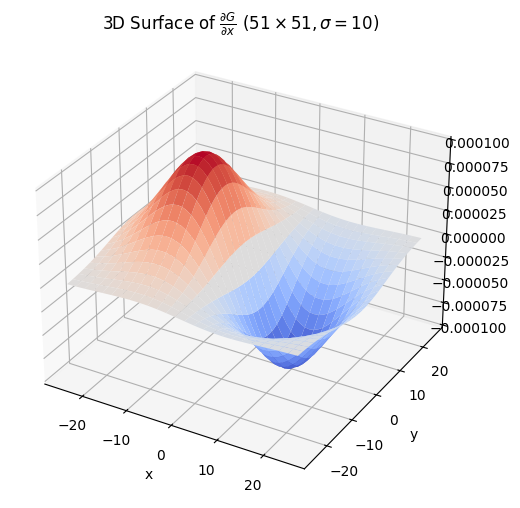

In [31]:
Gx_large, _ = get_dog_kernels(51, 10)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

center = 51 // 2
x_grid = np.arange(-center, center + 1)
y_grid = np.arange(-center, center + 1)
X, Y = np.meshgrid(x_grid, y_grid)

surf = ax.plot_surface(X, Y, Gx_large, cmap='coolwarm', linewidth=0)
ax.set_title(r'3D Surface of $\frac{\partial G}{\partial x}$ ($51\times51, \sigma=10$)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

##### Part D,E

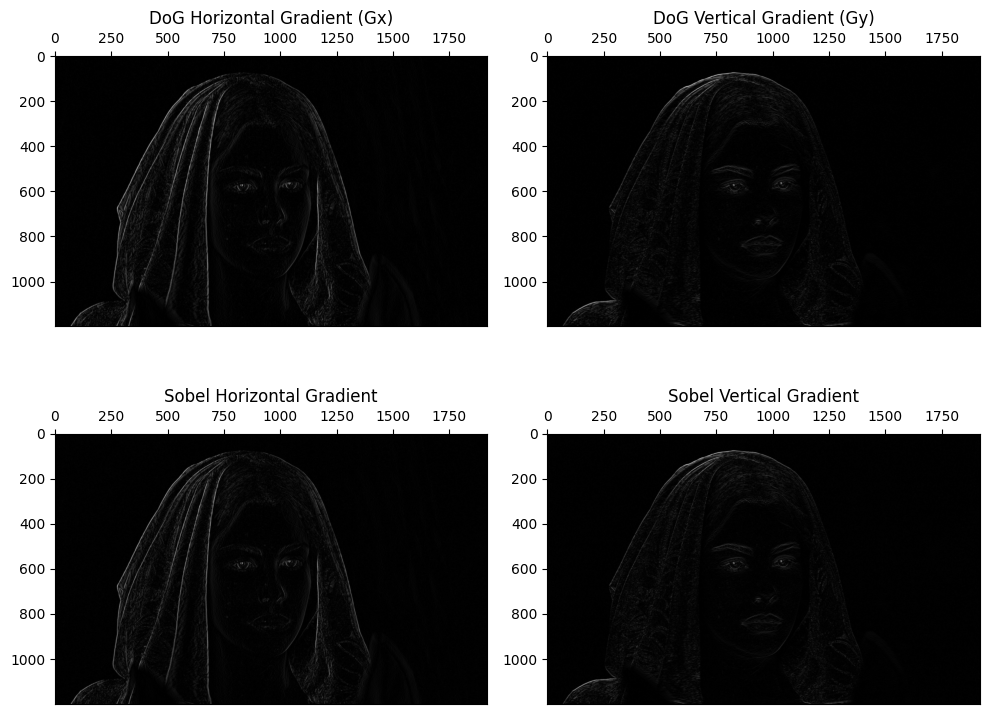

In [33]:
#
grad_x_dog = cv.filter2D(img_orig, cv.CV_64F, Gx_5)
grad_y_dog = cv.filter2D(img_orig, cv.CV_64F, Gy_5)

abs_grad_x_dog = np.abs(grad_x_dog)
abs_grad_y_dog = np.abs(grad_y_dog)

disp_x_dog = cv.normalize(abs_grad_x_dog, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
disp_y_dog = cv.normalize(abs_grad_y_dog, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

#
grad_x_sobel = cv.Sobel(img_orig, cv.CV_64F, 1, 0, ksize=5)
grad_y_sobel = cv.Sobel(img_orig, cv.CV_64F, 0, 1, ksize=5)

disp_x_sobel = cv.normalize(np.abs(grad_x_sobel), None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
disp_y_sobel = cv.normalize(np.abs(grad_y_sobel), None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

#
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Manual DoG Results
ax[0, 0].imshow(disp_x_dog, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('DoG Horizontal Gradient (Gx)')
ax[0, 0].xaxis.set_ticks_position('top')

ax[0, 1].imshow(disp_y_dog, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('DoG Vertical Gradient (Gy)')
ax[0, 1].xaxis.set_ticks_position('top')

# OpenCV Sobel Results
ax[1, 0].imshow(disp_x_sobel, cmap='gray', vmin=0, vmax=255)
ax[1, 0].set_title('Sobel Horizontal Gradient')
ax[1, 0].xaxis.set_ticks_position('top')

ax[1, 1].imshow(disp_y_sobel, cmap='gray', vmin=0, vmax=255)
ax[1, 1].set_title('Sobel Vertical Gradient')
ax[1, 1].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

## Question 07

In [35]:
def manual_zoom(img, scale_factor, method='nearest'):
    H, W = img.shape

    new_H = int(H * scale_factor)
    new_W = int(W * scale_factor)

    output_img = np.zeros((new_H, new_W), dtype=np.uint8)

    for i_out in range(new_H):
        for j_out in range(new_W):
            r = i_out / scale_factor
            c = j_out / scale_factor

            if method == 'nearest':
                r_near = int(np.round(r))
                c_near = int(np.round(c))

                r_near = min(max(r_near, 0), H - 1)
                c_near = min(max(c_near, 0), W - 1)

                output_img[i_out, j_out] = img[r_near, c_near]

            elif method == 'bilinear':
                r1 = int(np.floor(r))
                c1 = int(np.floor(c))

                r2 = min(r1 + 1, H - 1)
                c2 = min(c1 + 1, W - 1)

                a = r - r1
                b = c - c1

                f_11 = img[r1, c1]
                f_12 = img[r1, c2]
                f_21 = img[r2, c1]
                f_22 = img[r2, c2]

                val = (1 - a) * (1 - b) * f_11 + \
                      (1 - a) * (b) * f_12 + \
                      (a) * (1 - b) * f_21 + \
                      (a) * (b) * f_22

                output_img[i_out, j_out] = int(np.round(val))

    return output_img

# Compute normalized SSD
def compute_normalized_ssd(img_orig, img_zoomed):
    if img_orig.shape != img_zoomed.shape:
        img_zoomed = cv.resize(
            img_zoomed, (img_orig.shape[1], img_orig.shape[0]))

    arr_orig = img_orig.astype(np.float64)
    arr_zoomed = img_zoomed.astype(np.float64)

    diff_sq = np.sum((arr_orig - arr_zoomed) ** 2)
    norm = np.sum(arr_orig ** 2)

    return diff_sq / norm

# Load images
img_orig = cv.imread('taylor.jpg', cv.IMREAD_GRAYSCALE)
img_small = cv.imread('taylor_small.jpg', cv.IMREAD_GRAYSCALE)

# Calculate scale factor
scale_factor = img_orig.shape[1] / img_small.shape[1]
print(f"Calculated Scale Factor: {scale_factor:.2f}")

print("Applying Nearest Neighbor Zoom...")
zoom_nn = manual_zoom(img_small, scale_factor, method='nearest')

print("Applying Bilinear Interpolation Zoom...")
zoom_bilinear = manual_zoom(img_small, scale_factor, method='bilinear')

ssd_nn = compute_normalized_ssd(img_orig, zoom_nn)
ssd_bilinear = compute_normalized_ssd(img_orig, zoom_bilinear)

print(f"\nNormalized SSD (Nearest Neighbor): {ssd_nn:.6f}")
print(f"Normalized SSD (Bilinear):         {ssd_bilinear:.6f}")

Calculated Scale Factor: 5.00
Applying Nearest Neighbor Zoom...
Applying Bilinear Interpolation Zoom...

Normalized SSD (Nearest Neighbor): 0.007586
Normalized SSD (Bilinear):         0.006811


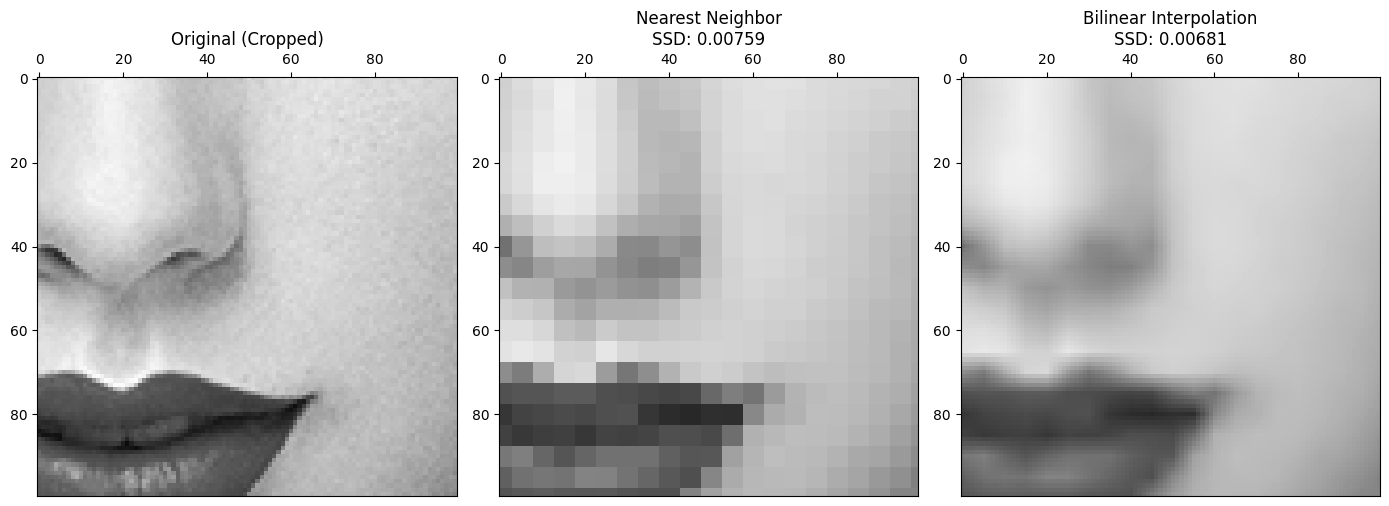

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

h, w = img_orig.shape
crop_y, crop_x = slice(h//2 - 50, h//2 + 50), slice(w//2 - 50, w//2 + 50)

ax[0].imshow(img_orig[crop_y, crop_x], cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original (Cropped)')
ax[0].xaxis.set_ticks_position('top')

ax[1].imshow(zoom_nn[crop_y, crop_x], cmap='gray', vmin=0, vmax=255)
ax[1].set_title(f'Nearest Neighbor\nSSD: {ssd_nn:.5f}')
ax[1].xaxis.set_ticks_position('top')

ax[2].imshow(zoom_bilinear[crop_y, crop_x], cmap='gray', vmin=0, vmax=255)
ax[2].set_title(f'Bilinear Interpolation\nSSD: {ssd_bilinear:.5f}')
ax[2].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

## Question 08

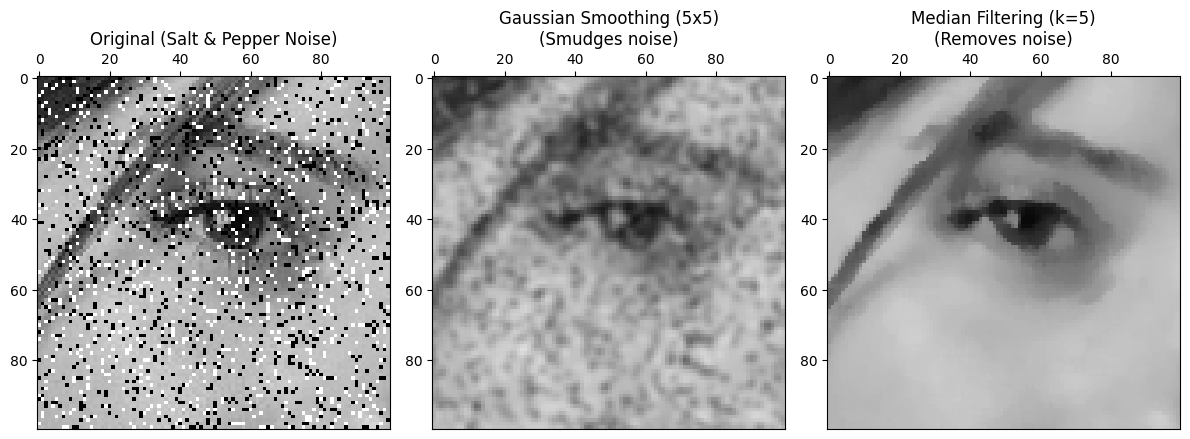

In [44]:
img_noisy = cv.imread('emma_salt_pepper.jpg', cv.IMREAD_GRAYSCALE)

img_gaussian = cv.GaussianBlur(img_noisy, (5, 5), 0)
img_median = cv.medianBlur(img_noisy, 5)

# Visualization
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

h, w = img_noisy.shape
cy, cx = h // 2, w // 2
crop_slice = (slice(cy - 50, cy + 50), slice(cx - 50, cx + 50))

# Original Noisy Image
ax[0].imshow(img_noisy[crop_slice], cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original (Salt & Pepper Noise)')
ax[0].xaxis.set_ticks_position('top')

# Gaussian Result
ax[1].imshow(img_gaussian[crop_slice], cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Gaussian Smoothing (5x5)\n(Smudges noise)')
ax[1].xaxis.set_ticks_position('top')

# Median Result
ax[2].imshow(img_median[crop_slice], cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Median Filtering (k=5)\n(Removes noise)')
ax[2].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

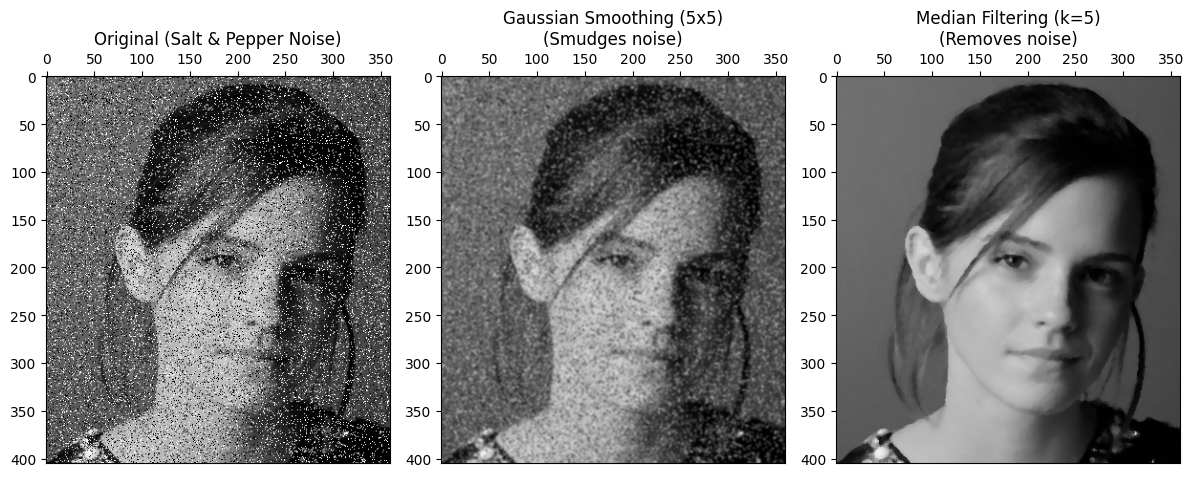

In [47]:
# Full Image
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

# Original Noisy Image
ax[0].imshow(img_noisy, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original (Salt & Pepper Noise)')
ax[0].xaxis.set_ticks_position('top')

# Gaussian Result
ax[1].imshow(img_gaussian, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Gaussian Smoothing (5x5)\n(Smudges noise)')
ax[1].xaxis.set_ticks_position('top')

# Median Result
ax[2].imshow(img_median, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Median Filtering (k=5)\n(Removes noise)')
ax[2].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

## Question 09

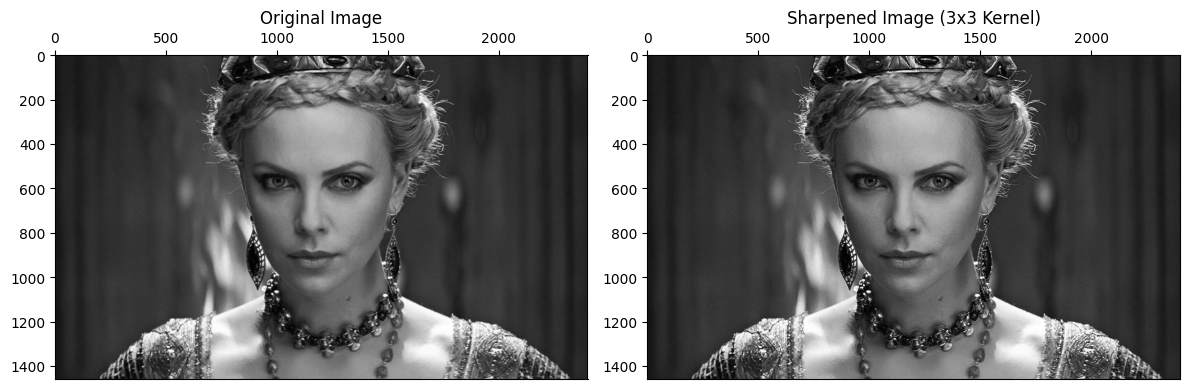

In [48]:
img_orig = cv.imread('im03.png', cv.IMREAD_GRAYSCALE)

kernel_sharpen = np.array([[0, -1,  0],
                           [-1,  5, -1],
                           [0, -1,  0]])

img_sharpened = cv.filter2D(img_orig, -1, kernel_sharpen)

#visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].xaxis.set_ticks_position('top')

# Sharpened
ax[1].imshow(img_sharpened, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Sharpened Image (3x3 Kernel)')
ax[1].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

## Question 10

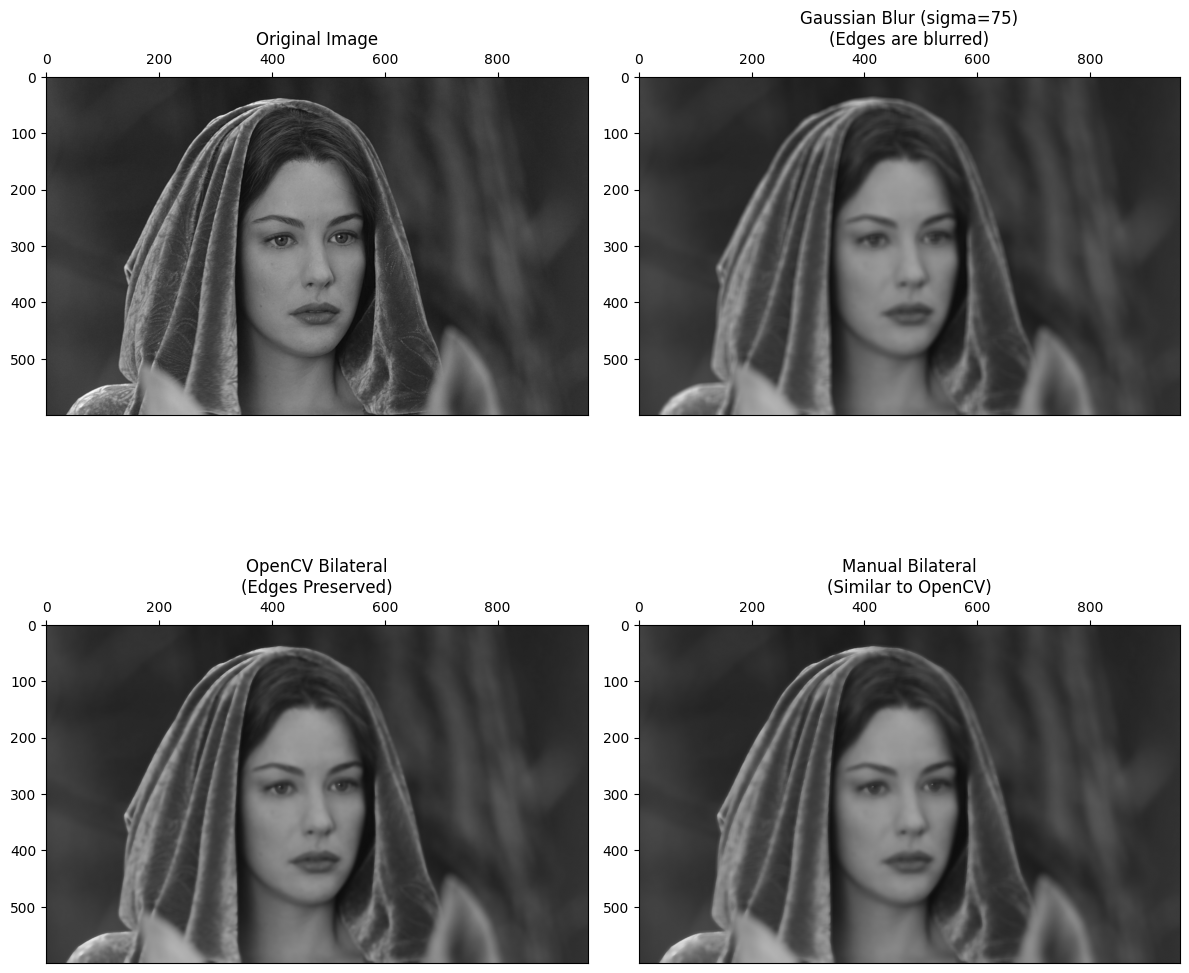

In [49]:
def manual_bilateral_filter(img, d, sigma_s, sigma_r):
    H, W = img.shape
    output_img = np.zeros_like(img)

    pad_size = d // 2
    padded_img = cv.copyMakeBorder(
        img, pad_size, pad_size, pad_size, pad_size, cv.BORDER_REFLECT)

    coords = np.arange(-pad_size, pad_size + 1)
    x, y = np.meshgrid(coords, coords)
    spatial_kernel = np.exp(-(x**2 + y**2) / (2 * sigma_s**2))

    for i in range(H):
        for j in range(W):
            roi = padded_img[i:i+d, j:j+d]
            center_val = padded_img[i + pad_size, j + pad_size]

            intensity_diff = roi.astype(float) - center_val

            range_kernel = np.exp(-(intensity_diff**2) / (2 * sigma_r**2))

            weights = spatial_kernel * range_kernel

            norm_factor = np.sum(weights)
            result = np.sum(weights * roi) / norm_factor

            output_img[i, j] = int(np.round(result))

    return output_img

# Load image
img_orig = cv.imread('im02.png', cv.IMREAD_GRAYSCALE)

img_small = cv.resize(img_orig, (0, 0), fx=0.5, fy=0.5)

# Apply Manual Bilateral Filter
d = 9
sigma_s = 75
sigma_r = 75

img_bilateral_manual = manual_bilateral_filter(img_small, d, sigma_s, sigma_r)

img_gaussian = cv.GaussianBlur(img_small, (d, d), sigma_s)

img_bilateral_cv = cv.bilateralFilter(img_small, d, sigma_r, sigma_s)

#visualization
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Original
ax[0, 0].imshow(img_small, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')
ax[0, 0].xaxis.set_ticks_position('top')

# Gaussian
ax[0, 1].imshow(img_gaussian, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title(f'Gaussian Blur (sigma={sigma_s})\n(Edges are blurred)')
ax[0, 1].xaxis.set_ticks_position('top')

# OpenCV Bilateral
ax[1, 0].imshow(img_bilateral_cv, cmap='gray', vmin=0, vmax=255)
ax[1, 0].set_title(f'OpenCV Bilateral\n(Edges Preserved)')
ax[1, 0].xaxis.set_ticks_position('top')

# Manual Bilateral
ax[1, 1].imshow(img_bilateral_manual, cmap='gray', vmin=0, vmax=255)
ax[1, 1].set_title(f'Manual Bilateral\n(Similar to OpenCV)')
ax[1, 1].xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()